Az Amerikai Egyesült Államok COVID-19 eseteinek és igazolt halálozásainak elemzése.

Working directory:

In [280]:
import os
print(os.getcwd())

C:\Users\Németh Barnabás


In [281]:
import pandas as pd
import numpy as np

Adathalmaz importálása:

In [282]:
covid = pd.read_csv('us-states.csv')

In [283]:
df = pd.DataFrame(covid)

In [284]:
df.head()

,date,state,fips,cases,deaths,confirmed_cases,confirmed_deaths,probable_cases,probable_deaths
0,2021-11-27,Alabama,1,844594,16115,620863.0,12479.0,223731.0,3636.0
1,2021-11-27,Alaska,2,149116,853,0.0,853.0,149116.0,0.0
2,2021-11-27,American Samoa,60,1,0,1.0,0.0,0.0,0.0
3,2021-11-27,Arizona,4,1258919,22177,NaN,NaN,NaN,NaN
4,2021-11-27,Arkansas,5,526706,8652,385559.0,6706.0,141147.0,1946.0


A feladatot lineráris regresszió segítségével oldom meg.
Az államonként jelentetett esetek (cases) és halálozások (deaths) közötti összefüggés:

In [285]:
import matplotlib.pyplot as plt

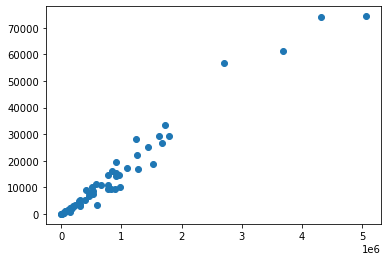

In [286]:
plt.scatter(df['cases'], df['deaths'])

Látható, hogy az adatokra pontos lineáris modell illeszthető.
Lineáris regresszióhoz használatos modulok importálása:

In [289]:
from sklearn import linear_model
regr = linear_model.LinearRegression()

In [292]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(covid, covid['cases'], random_state=0)

In [291]:
X_train

,date,state,fips,cases,deaths,confirmed_cases,confirmed_deaths,probable_cases,probable_deaths
31,2021-11-27,New Hampshire,33,155711,1683,0.0,NaN,155711.0,NaN
49,2021-11-27,Vermont,50,48120,406,0.0,NaN,48120.0,NaN
37,2021-11-27,Northern Mariana Islands,69,669,3,669.0,3.0,0.0,0.0
7,2021-11-27,Connecticut,9,418473,8865,NaN,NaN,NaN,NaN
14,2021-11-27,Idaho,16,305552,3892,242370.0,3207.0,63182.0,685.0
27,2021-11-27,Missouri,29,913351,15446,778035.0,13255.0,135316.0,2191.0
35,2021-11-27,North Carolina,37,1526197,18699,160629.0,1176.0,1365568.0,17523.0
50,2021-11-27,Virginia,51,963739,14635,NaN,NaN,NaN,NaN
18,2021-11-27,Kansas,20,462152,6704,NaN,NaN,NaN,NaN
52,2021-11-27,Washington,53,770886,9256,674686.0,2586.0,96200.0,6670.0


In [294]:
import numpy as np
regr.fit(np.array(X_train['deaths']).reshape(-1, 1), Y_train)
covid_y_pred = regr.predict(np.array(X_test['deaths']).reshape(-1, 1))

Hiba metrikákhoz tartozó függvények importálása:

In [295]:
from sklearn.metrics import mean_squared_error, r2_score

Írjuk ki az illesztés eredményét (együtthatók, hiba mértéke, korreláció, stb.):

In [296]:
print("Együtthatók: {0}".format(regr.coef_))
print("b: {0}".format(regr.intercept_))
print("MSE értéke: {0}".format(mean_squared_error(covid_y_pred, Y_test)))
print("R2 pontszám: {0}".format(r2_score(Y_test, covid_y_pred)))

Együtthatók: [58.21608655]
b: 69420.97541148902
MSE értéke: 26319819056.516415
R2 pontszám: 0.9691518253148459


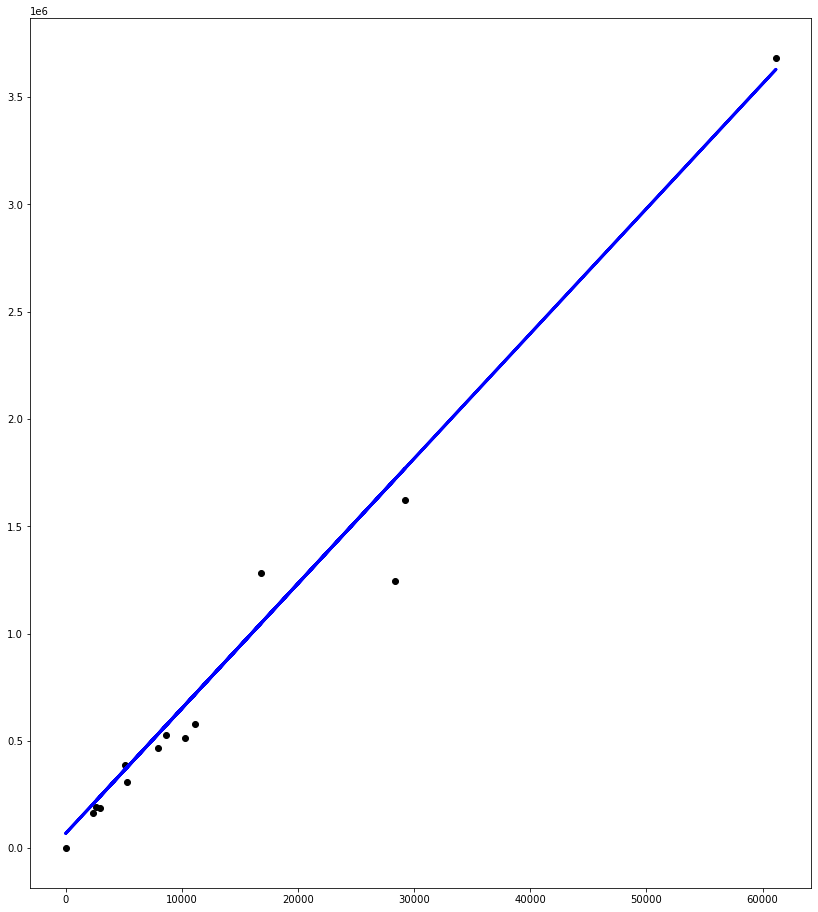

In [297]:
plt.figure(figsize=(14,16))
plt.scatter(X_test['deaths'], Y_test,  color='black')
plt.plot(X_test['deaths'], covid_y_pred, color='blue', linewidth=3)

Látható, hogy a COVID-19 esetek és a hozzákapcsoló halálozások soros korrelációban vannak.